# Data Poem Assignment

## Problem Statement

A time series-based regression dataset, that has 21 input features and 1 target variable. Each checkpoint represents the number cycles that have been rented from that particular checkpoint on the corresponding date and target is the sum of number of cycles that have been rented on that particular date. In addition to that you are also provided with weather data of the particular city. Also all the check points are in a single city for which weather data is provided. You need to analyse following mentioned points:

## Project Goals

The main objectives of this project are:

1. **Exploratory Data Analysis (EDA):** This involves handling anomalous values, gaining insights, and preparing the data for modeling.

2. **Implement Deep Learning Algorithms:** Apply deep learning algorithms to achieve a good Mean Absolute Percentage Error (MAPE) and overall error performance.

3. **Auto Hyperparameter Tuning:** Utilize auto hyperparameter tuning algorithms in combination with the deep learning models to optimize performance.

## Code Structure

The project code is divided into several sections, as outlined below:

### Section 1: Data Preprocessing

This section focuses on preparing the data for analysis. It involves the following steps:

1. **Library Imports:**
   - Importing necessary Python libraries such as pandas (for data manipulation), matplotlib (for plotting), and seaborn (for enhanced visualization).

2. **Data Loading:**
   - Reading the data from two CSV files (`Checkpoint_count.csv` and `weather.csv`) and storing them in separate DataFrames (`checkpoint_data` and `weather_data`).

3. **Basic EDA:**
   - Displaying the initial rows of the data to get a quick overview.
   - Obtaining summary statistics like mean, standard deviation, min, max, etc.
   - Checking the data types of each column (e.g., numeric, categorical).
   - Identifying missing values in the dataset.

### Section 2: Data Cleaning and Feature Engineering

This section focuses on preparing the data for analysis and modeling. It involves the following steps:

1. **Date Manipulation:**
   - Defining a function (`swap_dates`) to handle date formats where the day and month will be swapped. The function ensures the date is in the format `%d-%m-%Y`.

2. **Date Processing:**
   - Applying the `swap_dates` function to the 'Date' column in the 'checkpoint_data' DataFrame to ensure uniform date formatting.

3. **Column Operations:**
   - Dropping the original 'Date' column from 'checkpoint_data'.
   - Assigning the updated dates to the DataFrame.

4. **Data Merging:**
   - Renaming the 'Date/Time' column in the 'weather_data' DataFrame to 'Date'.
   - Performing an inner join between 'weather_data' and 'checkpoint_data' based on the 'Date' column, resulting in the 'merged_data' DataFrame.

5. **Column Cleanup:**
   - Handling irrelevant columns by dropping them for better clarity.
   - Renaming columns to improve readability and maintain consistency.

6. **Missing Value Handling:**
   - Using imputation techniques like K-Nearest Neighbors (KNN) imputation to fill missing values in specific columns.
   - Addressing special cases where values are represented as strings.

7. **Data Type Conversion:**
   - Converting the 'date' column to datetime format for ease of handling.

8. **Feature Engineering:**
   - Extracting the weekday information from the 'date' column and creating a new column 'weekend' to indicate whether the day is a weekend.

9. **Final Column Selection:**
   - Dropping unnecessary columns like 'day', 'spd_of_max_gust', 'max_temp', 'min_temp', and 'weekend'.

### Section 3: Exploratory Data Analysis (EDA)

This section is focused on gaining insights and visualizing relationships within the dataset:

1. **Pair Plots:**
   - Generating pair plots to visually explore relationships between multiple variables.

2. **Box Plots:**
   - Creating box plots to identify potential outliers and understand the distribution of the target variable across different categories.

### Section 4: Data Modeling

This section involves building and training machine learning models:

#### Deep Learning Model 1 (Feedforward Neural Network):

1. **Model Construction:**
   - Building a simple feedforward neural network with an input layer, hidden layers, and an output layer.

2. **Model Compilation:**
   - Compiling the model by specifying the optimizer and loss function.

3. **Model Training:**
   - Training the model on the preprocessed data.

4. **Model Evaluation:**
   - Assessing the model's performance using the Mean Absolute Percentage Error (MAPE).
   - MAPE: 0.3733

#### Deep Learning Model 2 (LSTM):

1. **Data Reshaping:**
   - Preparing the data for LSTM by reshaping it into the required format.

2. **Model Construction:**
   - Building an LSTM model with input and output layers.

3. **Model Compilation:**
   - Compiling the LSTM model.

4. **Model Training:**
   - Training the LSTM model on the preprocessed data.

5. **Model Evaluation:**
   - Assessing the LSTM model's performance using MAPE.
   - MAPE: 0.3765

#### Hyperparameter Tuning:

1. **Hyperparameter Search Space:**
   - Defining the range of hyperparameters to explore using Keras Tuner.

2. **Random Search:**
   - Implementing random search for hyperparameter tuning.

3. **Best Hyperparameters:**
   - Retrieving the best hyperparameters from the search.

4. **Model Rebuilding:**
   - Reconstructing the model with the optimized hyperparameters.

5. **Model Training and Evaluation:**
   - Training and evaluating the model with the tuned hyperparameters.
   - MAPE: 0.4281

## Usage

To run this project, follow these steps:

1. Ensure you have Python installed on your system.
2. Install the required libraries `pandas==1.3.3, matplotlib==3.4.3, seaborn==0.11.2, scikit-learn==0.24.2` `tensorflow==2.6.0, keras-tuner==1.0.4`
3. Execute the code cells in your preferred environment, ensuring the necessary data files (`Checkpoint_count.csv` and `weather.csv`) are in the same directory.

## Model Outputs

1. **Feedforward Neural Network:**
   - MAPE: 0.3733

2. **LSTM Model:**
   - MAPE: 0.3765

3. **Hyperparameter Tuned Model:**
   - MAPE: 0.4281

### Conclusion

In this data science project, we conducted a thorough analysis of a time series-based regression dataset with 21 input features and 1 target variable. The dataset represents the number of cycles rented from various checkpoints on corresponding dates, and it also includes weather data for the specific city.

We followed a structured approach to preprocess the data, which included handling date formats, merging datasets, imputing missing values, and performing feature engineering. Exploratory Data Analysis (EDA) provided valuable insights into the relationships between variables.

We implemented two deep learning models: a Feedforward Neural Network and an LSTM model. The models were trained and evaluated, and the **Feedforward Neural Network achieved** a Mean Absolute Percentage Error (MAPE) of approximately **0.3733**, while the **LSTM model** achieved a MAPE of approximately **0.3765**.

Furthermore, we conducted hyperparameter tuning using the Keras Tuner library, optimizing the model performance. The **hyperparameter tuned model** achieved a MAPE of approximately **0.4281**.

For any questions or feedback, please contact `Saurabh Harak` at `jobsforsaurabhharak@gmail.com`.


### =============================================================================
# Section 1: Data Loading and Inspection
### =============================================================================
## In this section, we load and inspect the raw data to understand its structure and content.

In [128]:
# Import the pandas library and alias it as 'pd' for convenience.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:


# Read the data from the CSV files and store them in respective DataFrames.
# "Checkpoint_count.csv" contains information about checkpoints,
# and "weather.csv" contains weather data.
checkpoint_data = pd.read_csv("Checkpoint_count.csv")
weather_data = pd.read_csv("weather.csv")


In [130]:
checkpoint_data.head()

,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
0,01-01-2015,00:00,58,12,4,17,33.0,49,21,16,...,NaN,58,91,24,3,NaN,17,78,21,6
1,01-02-2015,00:00,75,7,5,15,30.0,113,27,9,...,NaN,109,177,32,13,NaN,11,57,77,4
2,01-03-2015,00:00,79,7,3,7,30.0,107,36,12,...,NaN,71,131,33,5,NaN,14,174,40,5
3,01-04-2015,00:00,10,1,21,0,10.0,35,29,1,...,NaN,6,11,6,1,NaN,1,20,6,0
4,01-05-2015,00:00,42,0,2,0,27.0,90,21,1,...,NaN,0,5,49,20,NaN,0,41,56,10


In [131]:
checkpoint_data.describe()

,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,check_point8,check_point9,...,check_point11,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20
count,319.000000,319.000000,319.000000,319.000000,62.000000,319.000000,319.000000,319.000000,319.000000,52.000000,...,209.000000,319.000000,319.000000,319.000000,319.000000,50.000000,319.000000,319.000000,319.000000,319.000000
mean,2915.398119,2212.909091,2859.485893,1167.388715,89.935484,2208.031348,1011.175549,1137.316614,1754.257053,2090.250000,...,2164.578947,2207.626959,2939.294671,1477.206897,207.476489,4563.180000,1387.119122,1903.363636,2023.708464,295.347962
std,2276.281648,1832.808709,2337.531344,960.020397,51.886974,2452.475658,917.450049,991.065590,1415.004315,972.740577,...,1049.224968,1660.936427,2105.774880,1254.990855,231.009131,1667.554469,1070.781272,1376.375755,1632.368428,248.947624
min,10.000000,0.000000,0.000000,0.000000,10.000000,2.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,1554.000000,0.000000,20.000000,6.000000,0.000000
25%,387.500000,3.500000,33.000000,54.500000,46.500000,214.500000,119.000000,25.500000,61.000000,1275.000000,...,1221.000000,324.500000,513.000000,159.500000,15.500000,3097.250000,244.500000,457.000000,352.500000,47.000000
50%,3044.000000,2180.000000,3011.000000,1162.000000,85.000000,689.000000,1049.000000,1067.000000,1787.000000,2258.000000,...,2349.000000,2361.000000,3169.000000,1422.000000,107.000000,4825.500000,1519.000000,1855.000000,1762.000000,267.000000
75%,4968.000000,3937.000000,5088.000000,1948.000000,131.500000,4114.500000,1675.000000,2094.500000,3025.500000,2775.500000,...,2966.000000,3658.000000,4797.000000,2676.000000,337.000000,5957.750000,2237.000000,3111.000000,3539.000000,526.000000
max,7387.000000,6153.000000,7322.000000,3334.000000,207.000000,7905.000000,9999.000000,3035.000000,4867.000000,3997.000000,...,6014.000000,7921.000000,7695.000000,4118.000000,781.000000,7388.000000,4342.000000,5166.000000,5596.000000,820.000000


In [132]:
checkpoint_data.dtypes

Date              object
Time              object
check_point0       int64
check_point1       int64
check_point2       int64
check_point3       int64
check_point4     float64
check_point5       int64
check_point6       int64
check_point7       int64
check_point8       int64
check_point9     float64
check_point10      int64
check_point11    float64
check_point12      int64
check_point13      int64
check_point14      int64
check_point15      int64
check_point16    float64
check_point17      int64
check_point18      int64
check_point19      int64
check_point20      int64
dtype: object

In [133]:
#Datatypes of each column
checkpoint_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           319 non-null    object 
 1   Time           319 non-null    object 
 2   check_point0   319 non-null    int64  
 3   check_point1   319 non-null    int64  
 4   check_point2   319 non-null    int64  
 5   check_point3   319 non-null    int64  
 6   check_point4   62 non-null     float64
 7   check_point5   319 non-null    int64  
 8   check_point6   319 non-null    int64  
 9   check_point7   319 non-null    int64  
 10  check_point8   319 non-null    int64  
 11  check_point9   52 non-null     float64
 12  check_point10  319 non-null    int64  
 13  check_point11  209 non-null    float64
 14  check_point12  319 non-null    int64  
 15  check_point13  319 non-null    int64  
 16  check_point14  319 non-null    int64  
 17  check_point15  319 non-null    int64  
 18  check_poin

In [134]:
#Checking missing values
checkpoint_data.isnull().sum()

Date               0
Time               0
check_point0       0
check_point1       0
check_point2       0
check_point3       0
check_point4     257
check_point5       0
check_point6       0
check_point7       0
check_point8       0
check_point9     267
check_point10      0
check_point11    110
check_point12      0
check_point13      0
check_point14      0
check_point15      0
check_point16    269
check_point17      0
check_point18      0
check_point19      0
check_point20      0
dtype: int64

In [135]:
# Create a new column 'target' which is the sum of counts across all checkpoints
checkpoint_data['target'] = checkpoint_data.iloc[:, 2:].sum(axis=1)

# Display the updated dataset
checkpoint_data.head()


,Date,Time,check_point0,check_point1,check_point2,check_point3,check_point4,check_point5,check_point6,check_point7,...,check_point12,check_point13,check_point14,check_point15,check_point16,check_point17,check_point18,check_point19,check_point20,target
0,01-01-2015,00:00,58,12,4,17,33.0,49,21,16,...,58,91,24,3,NaN,17,78,21,6,531.0
1,01-02-2015,00:00,75,7,5,15,30.0,113,27,9,...,109,177,32,13,NaN,11,57,77,4,804.0
2,01-03-2015,00:00,79,7,3,7,30.0,107,36,12,...,71,131,33,5,NaN,14,174,40,5,774.0
3,01-04-2015,00:00,10,1,21,0,10.0,35,29,1,...,6,11,6,1,NaN,1,20,6,0,158.0
4,01-05-2015,00:00,42,0,2,0,27.0,90,21,1,...,0,5,49,20,NaN,0,41,56,10,371.0


### =============================================================================
# Section 2: Data Preprocessing and Feature Engineering
### =============================================================================
## In this section, we perform data cleaning, handle missing values, and engineer new features.
## Additionally, we define a function 'swap_dates' to parse and potentially swap the day and month in date strings.

In [136]:
from datetime import datetime

def swap_dates(date_str):
    """
    Parses a date string in the format '%d-%m-%Y' or '%d/%m/%Y' and swaps the day and month if the day is less than or equal to 12.

    Parameters:
    - date_str (str): The date string to be parsed.

    Returns:
    - str: The parsed and potentially swapped date string in the format '%d-%m-%Y'.
    """
    # Try parsing the date with both formats
    try:
        date = datetime.strptime(date_str, '%d-%m-%Y')
    except ValueError:
        date = datetime.strptime(date_str, '%d/%m/%Y')
    
    # Check if day is less than or equal to 12
    if date.day <= 12:
        # Swap day and month
        new_date = date.replace(day=date.month, month=date.day)
        return new_date.strftime('%d-%m-%Y')
    else:
        return date.strftime('%d-%m-%Y')




In [137]:
# Apply the function 'swap_dates' to the 'Date' column in the 'checkpoint_data' DataFrame.
dates = checkpoint_data["Date"].apply(swap_dates)


In [138]:
listdate = list(dates)

In [139]:
listdate

['01-01-2015',
 '02-01-2015',
 '03-01-2015',
 '04-01-2015',
 '05-01-2015',
 '06-01-2015',
 '07-01-2015',
 '08-01-2015',
 '09-01-2015',
 '10-01-2015',
 '11-01-2015',
 '12-01-2015',
 '13-01-2015',
 '14-01-2015',
 '15-01-2015',
 '16-01-2015',
 '17-01-2015',
 '18-01-2015',
 '19-01-2015',
 '20-01-2015',
 '21-01-2015',
 '22-01-2015',
 '23-01-2015',
 '24-01-2015',
 '25-01-2015',
 '26-01-2015',
 '27-01-2015',
 '28-01-2015',
 '29-01-2015',
 '30-01-2015',
 '31-01-2015',
 '01-02-2015',
 '02-02-2015',
 '03-02-2015',
 '04-02-2015',
 '05-02-2015',
 '06-02-2015',
 '07-02-2015',
 '08-02-2015',
 '09-02-2015',
 '10-02-2015',
 '11-02-2015',
 '12-02-2015',
 '13-02-2015',
 '14-02-2015',
 '15-02-2015',
 '16-02-2015',
 '17-02-2015',
 '18-02-2015',
 '19-02-2015',
 '20-02-2015',
 '21-02-2015',
 '22-02-2015',
 '23-02-2015',
 '24-02-2015',
 '25-02-2015',
 '26-02-2015',
 '27-02-2015',
 '28-02-2015',
 '01-03-2015',
 '02-03-2015',
 '03-03-2015',
 '04-03-2015',
 '05-03-2015',
 '06-03-2015',
 '07-03-2015',
 '08-03-20

In [140]:
# Drop the 'Date' column from the 'checkpoint_data' DataFrame.
checkpoint_data = checkpoint_data.drop(columns=['Date'])

In [141]:
# Assign values from the 'dates' variable to the 'Date' column in the 'checkpoint_data' DataFrame.
checkpoint_data["Date"] = dates

In [142]:
weather_data.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,01-01-2015,2015,1,1,‡,-3.0,NaN,-7.6,NaN,-5.3,...,1.8,NaN,1.8,NaN,0.0,NaN,22.0,NaN,63,NaN
1,02-01-2015,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,0.0,T,0.0,T,1.0,NaN,27.0,NaN,50,NaN
2,03-01-2015,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,17.0,NaN,17.0,NaN,1.0,NaN,3.0,NaN,41,NaN
3,04-01-2015,2015,1,4,‡,3.0,NaN,-8.6,NaN,-2.8,...,0.4,NaN,27.2,NaN,8.0,NaN,26.0,NaN,69,NaN
4,05-01-2015,2015,1,5,‡,-5.3,NaN,-17.9,NaN,-11.6,...,0.0,T,0.0,T,6.0,NaN,27.0,NaN,74,NaN


### =============================================================================
# Section 3: Data Merging and Alignment
### =============================================================================
## This section involves merging the weather data with the checkpoint data based on date.
## The alignment ensures that weather data is appropriately associated with the corresponding rental checkpoints sum data.

In [143]:
# Rename the 'Date/Time' column to 'Date' in the 'weather_data' DataFrame.
weather_data.rename(columns={'Date/Time': 'Date'}, inplace=True)


In [145]:
# Perform an inner join between the 'weather_data' and 'checkpoint_data' DataFrames
# based on the 'Date' column, and store the result in the 'merged_data' DataFrame.
merged_data = pd.merge(weather_data, checkpoint_data[['Date', 'target']], on='Date', how='inner')


In [146]:
# Display the merged DataFrame
merged_data.head()


,Date,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,target
0,01-01-2015,2015,1,1,‡,-3.0,NaN,-7.6,NaN,-5.3,...,NaN,1.8,NaN,0.0,NaN,22.0,NaN,63,NaN,531.0
1,02-01-2015,2015,1,2,‡,-3.4,NaN,-14.2,NaN,-8.8,...,T,0.0,T,1.0,NaN,27.0,NaN,50,NaN,804.0
2,03-01-2015,2015,1,3,‡,-8.5,NaN,-17.7,NaN,-13.1,...,NaN,17.0,NaN,1.0,NaN,3.0,NaN,41,NaN,774.0
3,04-01-2015,2015,1,4,‡,3.0,NaN,-8.6,NaN,-2.8,...,NaN,27.2,NaN,8.0,NaN,26.0,NaN,69,NaN,158.0
4,05-01-2015,2015,1,5,‡,-5.3,NaN,-17.9,NaN,-11.6,...,T,0.0,T,6.0,NaN,27.0,NaN,74,NaN,371.0


In [147]:
merged_data.shape

(319, 28)

In [148]:
merged_data.isnull().sum()

Date                           0
Year                           0
Month                          0
Day                            0
Data Quality                   0
Max Temp (°C)                  0
Max Temp Flag                319
Min Temp (°C)                  0
Min Temp Flag                318
Mean Temp (°C)                 0
Mean Temp Flag               318
Heat Deg Days (°C)             0
Heat Deg Days Flag           318
Cool Deg Days (°C)             0
Cool Deg Days Flag           318
Total Rain (mm)               11
Total Rain Flag              281
Total Snow (cm)                3
Total Snow Flag              294
Total Precip (mm)              8
Total Precip Flag            266
Snow on Grnd (cm)            220
Snow on Grnd Flag            319
Dir of Max Gust (10s deg)     69
Dir of Max Gust Flag         318
Spd of Max Gust (km/h)         1
Spd of Max Gust Flag         318
target                         0
dtype: int64

In [149]:
merged_data.describe()

,Year,Month,Day,Max Temp (°C),Max Temp Flag,Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),target
count,319.0,319.000000,319.000000,319.000000,0.0,319.000000,319.000000,319.000000,319.000000,308.000000,316.000000,311.000000,99.000000,0.0,250.000000,319.000000
mean,2015.0,5.783699,15.351097,12.989342,NaN,2.887147,7.948589,11.105956,1.054545,2.502597,0.439873,2.936977,10.060606,NaN,20.592000,31329.429467
std,0.0,3.037540,8.802636,13.537389,NaN,13.369551,13.367874,12.299696,1.980003,6.501285,1.557386,6.522864,6.766994,NaN,9.101477,23781.986862
min,2015.0,1.000000,1.000000,-18.000000,NaN,-27.500000,-20.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,158.000000
25%,2015.0,3.000000,8.000000,2.200000,NaN,-6.550000,-2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,NaN,17.250000,3163.500000
50%,2015.0,6.000000,15.000000,16.800000,NaN,5.800000,11.100000,6.900000,0.000000,0.000000,0.000000,0.000000,10.000000,NaN,23.000000,34529.000000
75%,2015.0,8.000000,23.000000,24.500000,NaN,14.200000,19.300000,20.300000,1.300000,1.000000,0.000000,2.900000,16.000000,NaN,26.000000,53764.000000
max,2015.0,11.000000,31.000000,32.200000,NaN,21.900000,27.100000,38.900000,9.100000,47.200000,17.000000,47.200000,23.000000,NaN,36.000000,81618.000000


In [150]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       319 non-null    object 
 1   Year                       319 non-null    int64  
 2   Month                      319 non-null    int64  
 3   Day                        319 non-null    int64  
 4   Data Quality               319 non-null    object 
 5   Max Temp (°C)              319 non-null    float64
 6   Max Temp Flag              0 non-null      float64
 7   Min Temp (°C)              319 non-null    float64
 8   Min Temp Flag              1 non-null      object 
 9   Mean Temp (°C)             319 non-null    float64
 10  Mean Temp Flag             1 non-null      object 
 11  Heat Deg Days (°C)         319 non-null    float64
 12  Heat Deg Days Flag         1 non-null      object 
 13  Cool Deg Days (°C)         319 non-null    float64

In [151]:
merged_data.isnull().sum()

Date                           0
Year                           0
Month                          0
Day                            0
Data Quality                   0
Max Temp (°C)                  0
Max Temp Flag                319
Min Temp (°C)                  0
Min Temp Flag                318
Mean Temp (°C)                 0
Mean Temp Flag               318
Heat Deg Days (°C)             0
Heat Deg Days Flag           318
Cool Deg Days (°C)             0
Cool Deg Days Flag           318
Total Rain (mm)               11
Total Rain Flag              281
Total Snow (cm)                3
Total Snow Flag              294
Total Precip (mm)              8
Total Precip Flag            266
Snow on Grnd (cm)            220
Snow on Grnd Flag            319
Dir of Max Gust (10s deg)     69
Dir of Max Gust Flag         318
Spd of Max Gust (km/h)         1
Spd of Max Gust Flag         318
target                         0
dtype: int64

In [152]:

# List of columns to be dropped from the 'merged_data' DataFrame.
flag_columns = ['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag',
                 'Cool Deg Days Flag', 'Total Rain Flag', 'Total Snow Flag',
                 'Total Precip Flag', 'Snow on Grnd Flag', 'Dir of Max Gust Flag',
                 'Spd of Max Gust Flag','Data Quality']

# Drop the specified columns from the 'merged_data' DataFrame.
merged_data = merged_data.drop(columns=flag_columns)

# Display the first few rows of the modified DataFrame.
merged_data.head()



,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),target
0,01-01-2015,2015,1,1,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,63,531.0
1,02-01-2015,2015,1,2,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,50,804.0
2,03-01-2015,2015,1,3,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,41,774.0
3,04-01-2015,2015,1,4,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,69,158.0
4,05-01-2015,2015,1,5,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,74,371.0


In [153]:
# Dictionary containing old column names as keys and new column names as values.
new_column_names = {
    'Date/Time': 'date',
    'Max Temp (°C)': 'max_temp',
    'Min Temp (°C)': 'min_temp',
    'Mean Temp (°C)': 'mean_temp',
    'Heat Deg Days (°C)': 'heat_deg_days',
    'Cool Deg Days (°C)': 'cool_deg_days',
    'Total Rain (mm)': 'total_rain',
    'Total Snow (cm)': 'total_snow',
    'Total Precip (mm)': 'total_precip',
    'Snow on Grnd (cm)': 'snow_on_grnd',
    'Dir of Max Gust (10s deg)': 'dir_of_max_gust',
    'Spd of Max Gust (km/h)': 'spd_of_max_gust',
    'Date':'date',
    'Year':'year',
    'Month':"month",
    'Day':'day'
}

# Rename the columns in the 'merged_data' DataFrame using the provided dictionary.
merged_data = merged_data.rename(columns=new_column_names)


In [154]:
# Import the KNNImputer from sklearn for missing value imputation.
from sklearn.impute import KNNImputer
merged_data.replace('<31', int(31), inplace=True)
# Create an instance of KNNImputer with 5 nearest neighbors.
imputer = KNNImputer(n_neighbors=5)

# Apply imputation to the specified columns in the 'merged_data' DataFrame.
merged_data[['dir_of_max_gust', 'spd_of_max_gust']] = imputer.fit_transform(merged_data[['dir_of_max_gust','spd_of_max_gust']])

# Fill missing values in 'total_rain', 'total_snow', 'total_precip', and 'snow_on_grnd' columns with 0.
merged_data['total_rain'].fillna(0, inplace=True)
merged_data['total_snow'].fillna(0, inplace=True)
merged_data['total_precip'].fillna(0, inplace=True)
merged_data['snow_on_grnd'].fillna(0, inplace=True)



In [155]:
merged_data.replace('<31', int(31), inplace=True)

In [156]:
merged_data.isnull().sum()

date               0
year               0
month              0
day                0
max_temp           0
min_temp           0
mean_temp          0
heat_deg_days      0
cool_deg_days      0
total_rain         0
total_snow         0
total_precip       0
snow_on_grnd       0
dir_of_max_gust    0
spd_of_max_gust    0
target             0
dtype: int64

In [157]:
# Convert the 'date' column to datetime format with the specified format.
merged_data['date'] = pd.to_datetime(merged_data['date'], format='%d-%m-%Y')

# Extract the weekday information from the 'date' column and create a new column 'weekday'.
merged_data['weekday'] = merged_data['date'].dt.weekday

# Create a new column 'weekend' to indicate if the day is a weekend (1 for Saturday or Sunday, 0 otherwise).
merged_data['weekend'] = (merged_data['weekday'] >= 5).astype(int)

# Drop the 'weekday' column as it is no longer needed.
merged_data = merged_data.drop('weekday', axis=1)

In [158]:
merged_data

,date,year,month,day,max_temp,min_temp,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_precip,snow_on_grnd,dir_of_max_gust,spd_of_max_gust,target,weekend
0,2015-01-01,2015,1,1,-3.0,-7.6,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,63.0,531.0,0
1,2015-01-02,2015,1,2,-3.4,-14.2,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,50.0,804.0,0
2,2015-01-03,2015,1,3,-8.5,-17.7,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,41.0,774.0,1
3,2015-01-04,2015,1,4,3.0,-8.6,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,69.0,158.0,1
4,2015-01-05,2015,1,5,-5.3,-17.9,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,74.0,371.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-11-11,2015,11,11,10.8,4.0,7.4,10.6,0.0,0.2,0.0,0.2,0.0,14.8,31.0,40940.0,0
315,2015-11-12,2015,11,12,11.9,6.3,9.1,8.9,0.0,15.6,0.0,15.6,0.0,23.0,63.0,24175.0,0
316,2015-11-13,2015,11,13,9.4,0.9,5.2,12.8,0.0,0.0,0.0,0.0,0.0,24.0,48.0,23331.0,0
317,2015-11-14,2015,11,14,4.1,-0.2,2.0,16.0,0.0,0.0,0.0,0.0,0.0,26.0,50.0,13298.0,1


### =============================================================================
# Section 4: Exploratory Data Analysis (EDA)
### =============================================================================
## Conducting exploratory data analysis to gain insights and identify patterns in the data.

c:\Users\31658\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


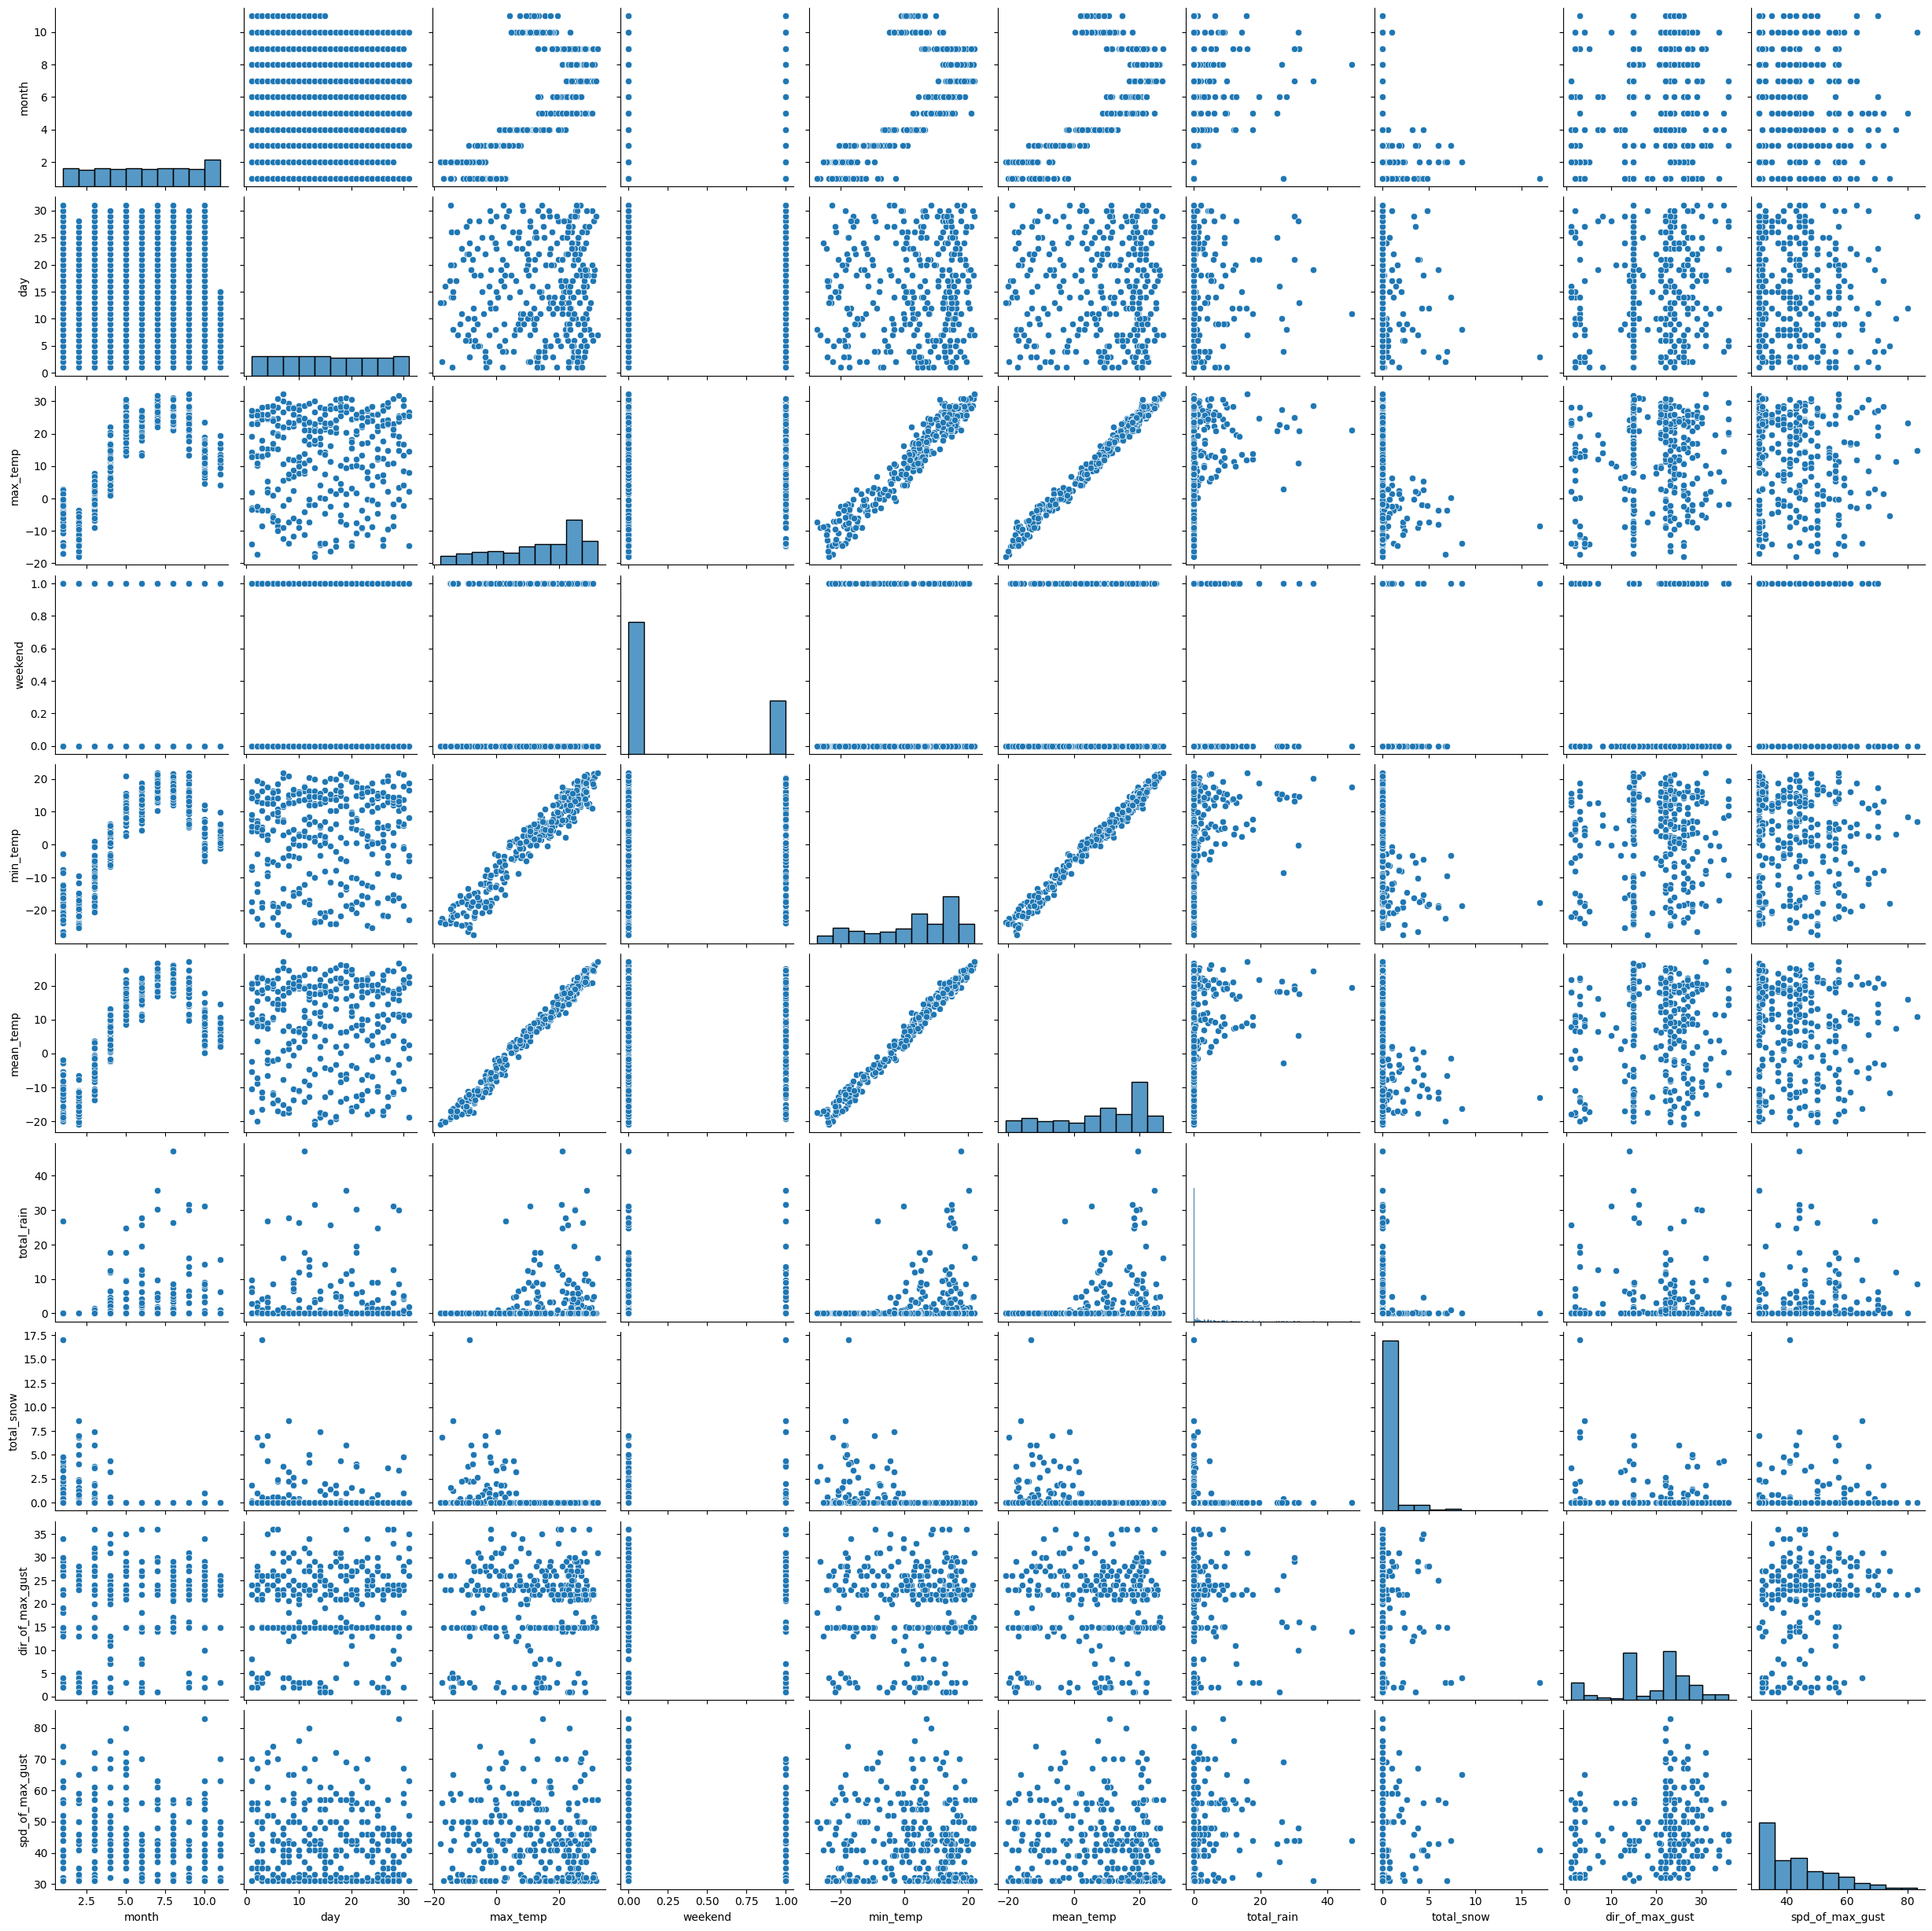

In [159]:
# Import the seaborn library and alias it as 'sns' for convenience.
import seaborn as sns

# Create a pairplot using selected variables from the 'merged_data' DataFrame.
sns.pairplot(merged_data, vars=['month','day','max_temp','weekend','min_temp', 'mean_temp', 'total_rain', 'total_snow','dir_of_max_gust', 'spd_of_max_gust'])


<Axes: xlabel='month', ylabel='target'>

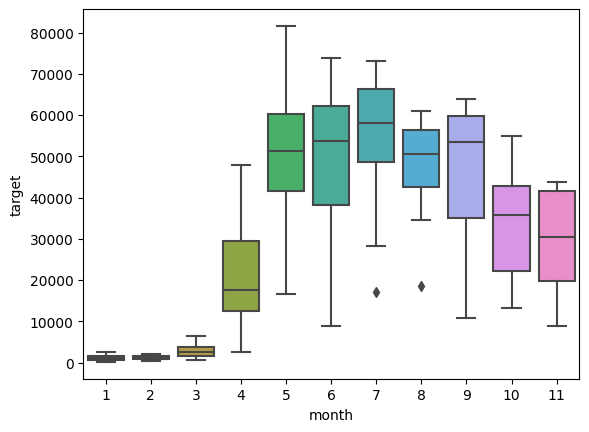

In [160]:
# Create a boxplot using Seaborn.
# 'x' specifies the variable for the x-axis (month), and 'y' specifies the variable for the y-axis (target).
# 'data' specifies the DataFrame to be used (merged_data).
sns.boxplot(x='month', y='target', data=merged_data)



<Axes: xlabel='day', ylabel='target'>

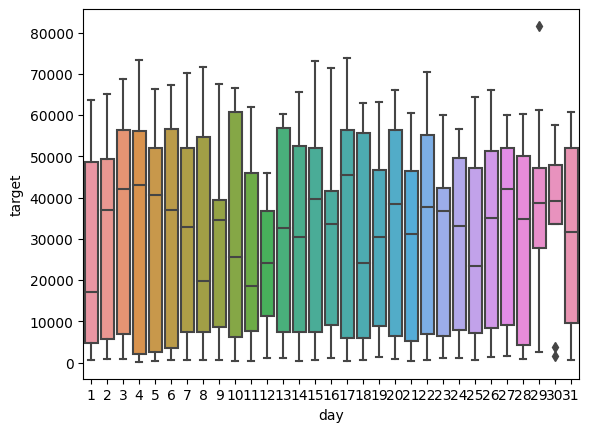

In [161]:
# Create a boxplot using Seaborn.
# 'x' specifies the variable for the x-axis (day), and 'y' specifies the variable for the y-axis (target).
# 'data' specifies the DataFrame to be used (merged_data).
sns.boxplot(x='day', y='target', data=merged_data)


<Axes: xlabel='weekend', ylabel='target'>

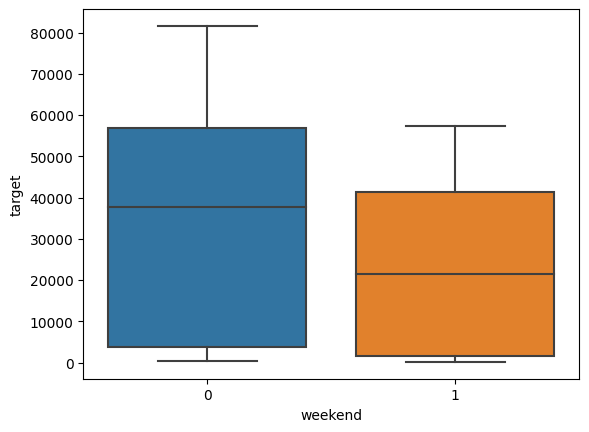

In [162]:
# Create a boxplot using Seaborn.
# 'x' specifies the variable for the x-axis (weekend), and 'y' specifies the variable for the y-axis (target).
# 'data' specifies the DataFrame to be used (merged_data).
sns.boxplot(x='weekend', y='target', data=merged_data)


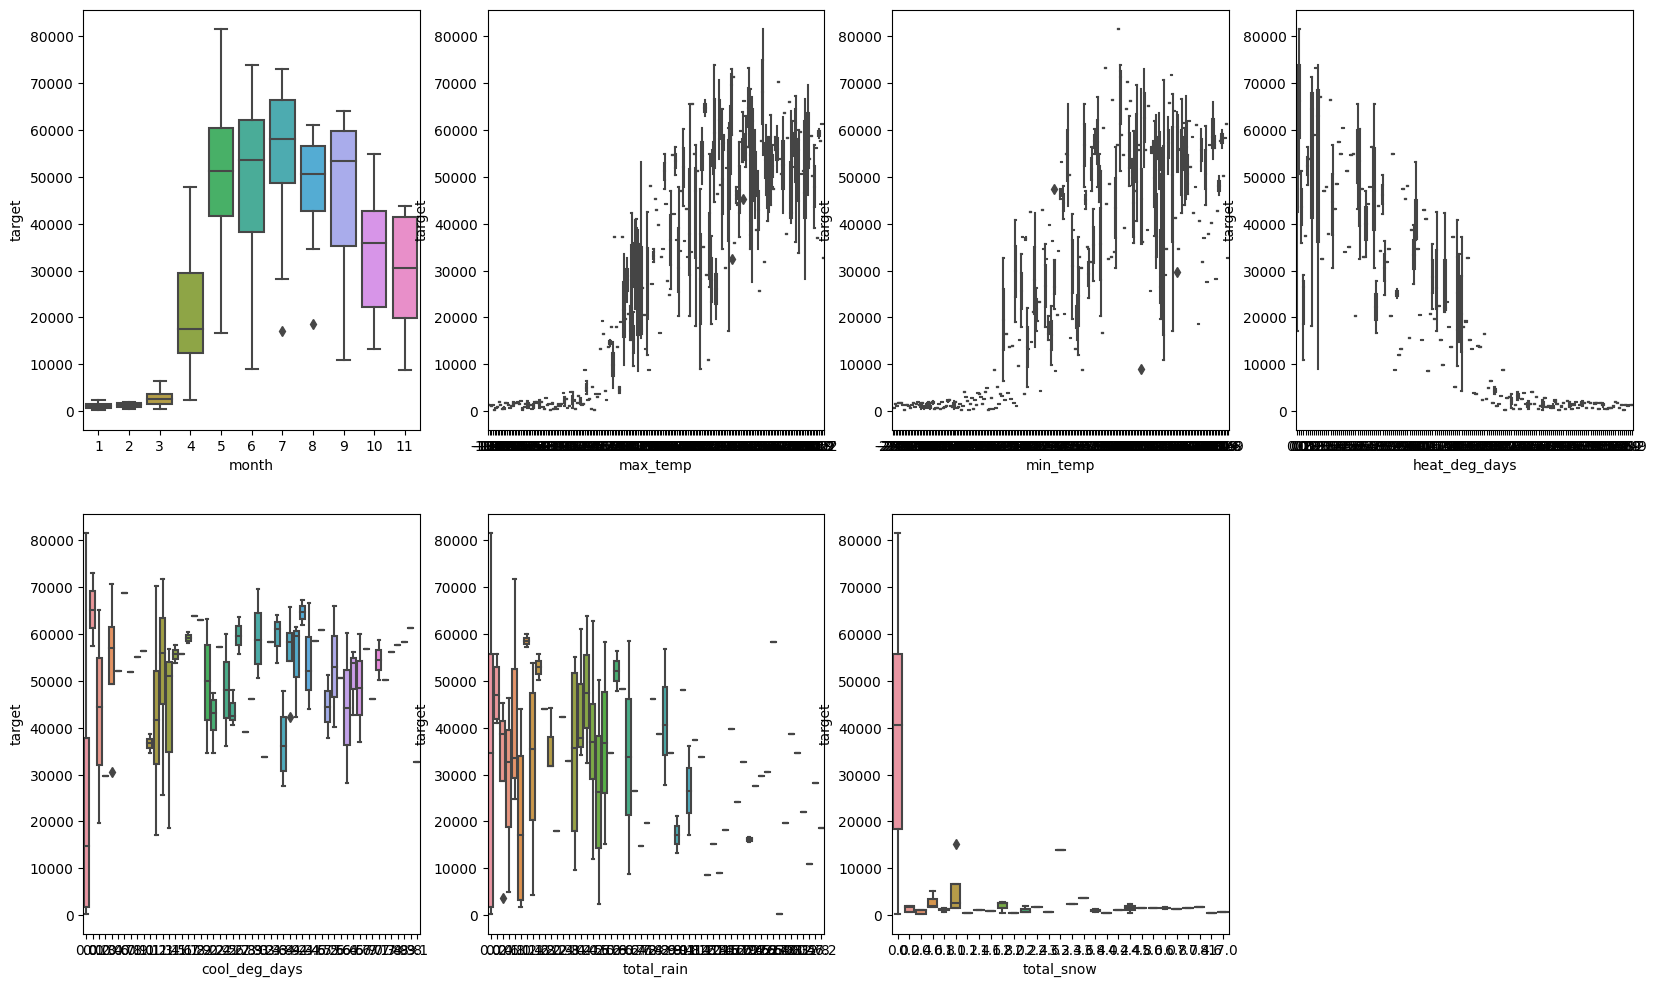

In [163]:
# Set the figure size to 20x12 inches.
plt.figure(figsize=(20, 12))

# Create a subplot grid with 2 rows and 4 columns.
# Then, plot boxplots for different variables against the target variable 'target'.
plt.subplot(2,4,1)
sns.boxplot(x = 'month', y = 'target', data = merged_data)

plt.subplot(2,4,2)
sns.boxplot(x = 'max_temp', y = 'target', data = merged_data)

plt.subplot(2,4,3)
sns.boxplot(x = 'min_temp', y = 'target', data = merged_data)

plt.subplot(2,4,4)
sns.boxplot(x = 'heat_deg_days', y = 'target', data = merged_data)

plt.subplot(2,4,5)
sns.boxplot(x = 'cool_deg_days', y = 'target', data = merged_data)

plt.subplot(2,4,6)
sns.boxplot(x = 'total_rain', y = 'target', data = merged_data)

plt.subplot(2,4,7)
sns.boxplot(x = 'total_snow', y = 'target', data = merged_data)

# Show the plots.
plt.show()


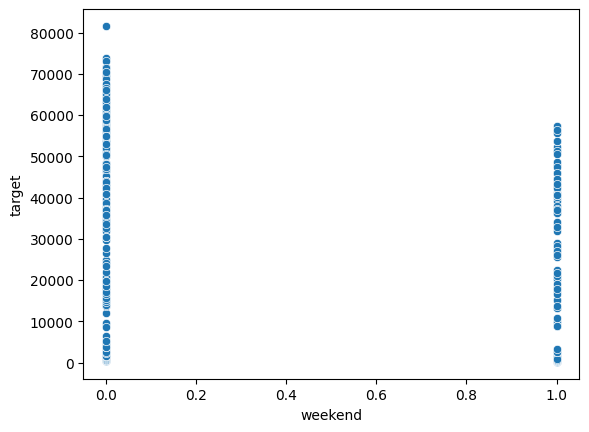

In [164]:
# Create a scatter plot using Seaborn.
# 'x' specifies the variable for the x-axis (weekend), and 'y' specifies the variable for the y-axis (target).
# 'data' specifies the DataFrame to be used (merged_data).
sns.scatterplot(x='weekend', y='target', data=merged_data)

# Show the plot.
plt.show()


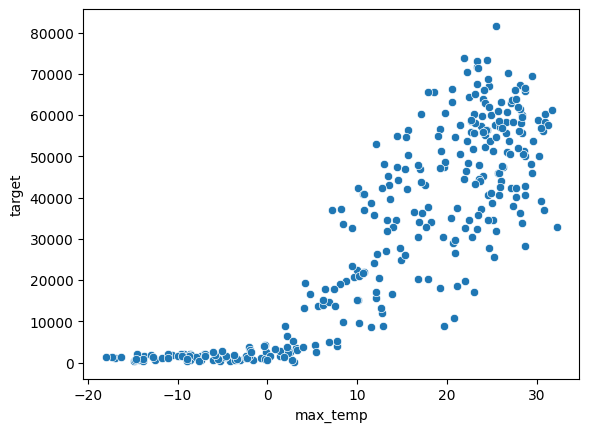

In [165]:
#scatter plot for temperature to target
sns.scatterplot(x='max_temp',y='target' ,data=merged_data)
plt.show()

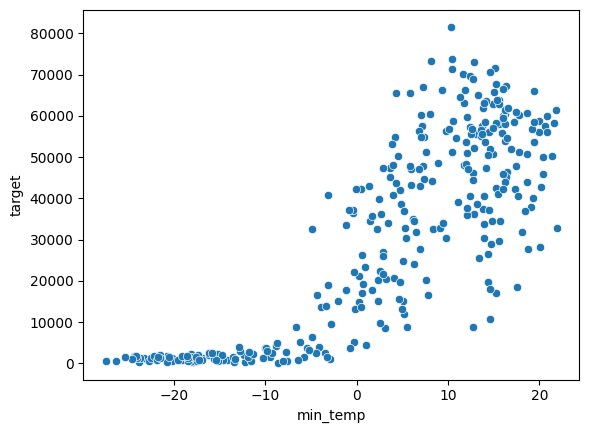

In [166]:

sns.scatterplot(x='min_temp',y='target' ,data=merged_data)
plt.show()

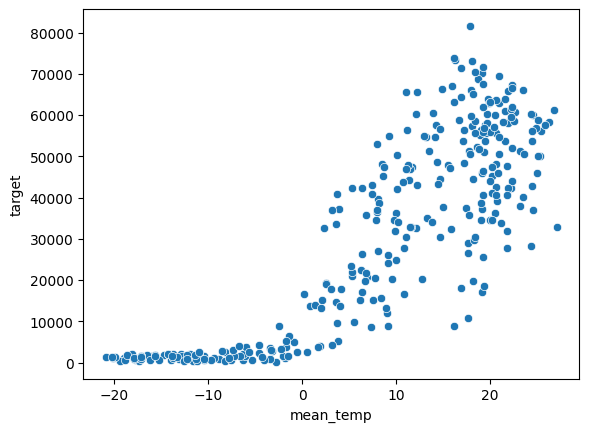

In [167]:
sns.scatterplot(x='mean_temp',y='target' ,data=merged_data)
plt.show()

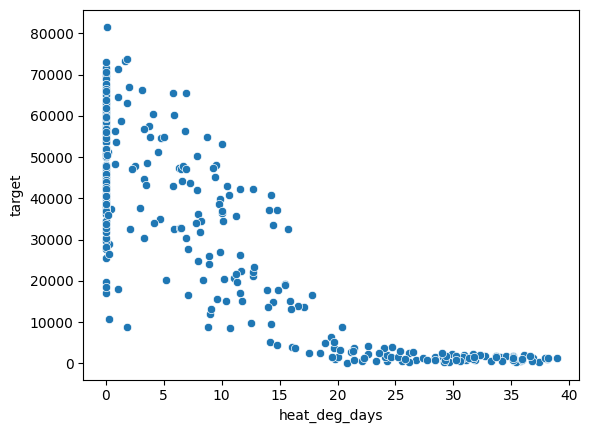

In [168]:

sns.scatterplot(x='heat_deg_days',y='target' ,data=merged_data)
plt.show()

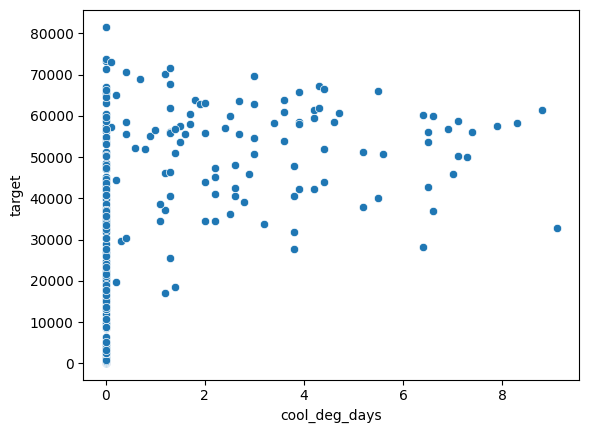

In [169]:
sns.scatterplot(x='cool_deg_days',y='target' ,data=merged_data)
plt.show()

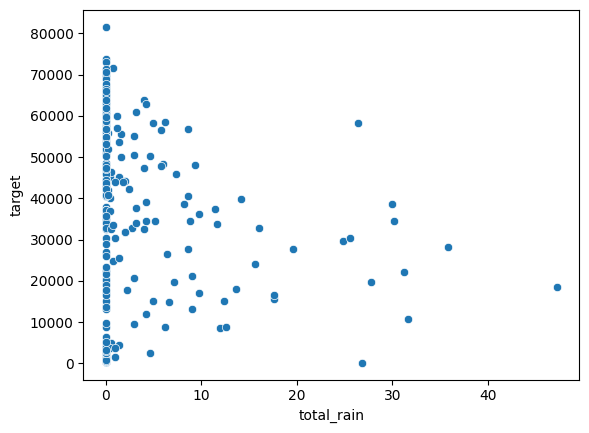

In [170]:
sns.scatterplot(x='total_rain',y='target' ,data=merged_data)
plt.show()

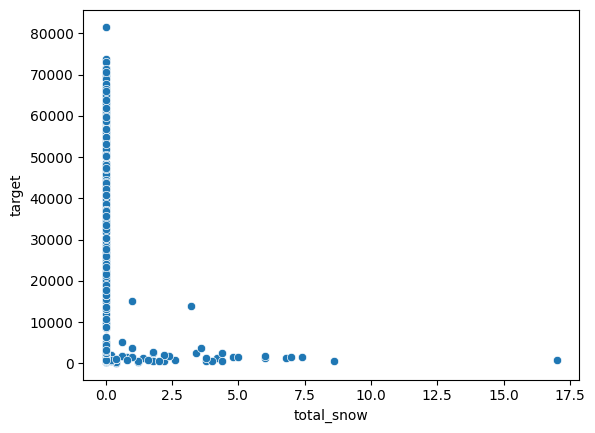

In [171]:
sns.scatterplot(x='total_snow',y='target' ,data=merged_data)
plt.show()

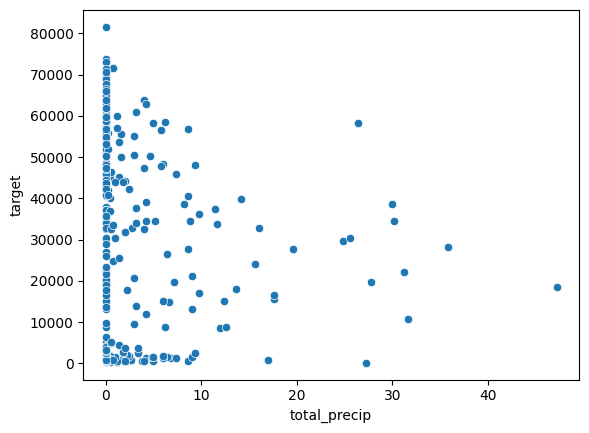

In [172]:
sns.scatterplot(x='total_precip',y='target' ,data=merged_data)
plt.show()

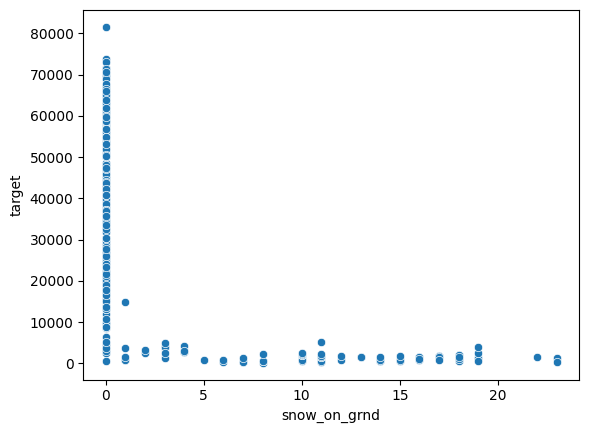

In [173]:
sns.scatterplot(x='snow_on_grnd',y='target' ,data=merged_data)
plt.show()

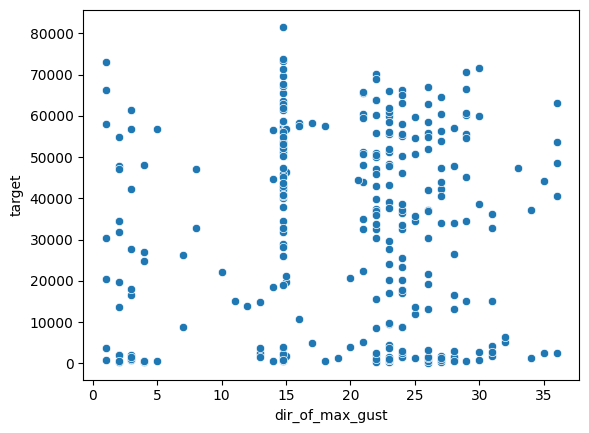

In [174]:
sns.scatterplot(x='dir_of_max_gust',y='target' ,data=merged_data)
plt.show()

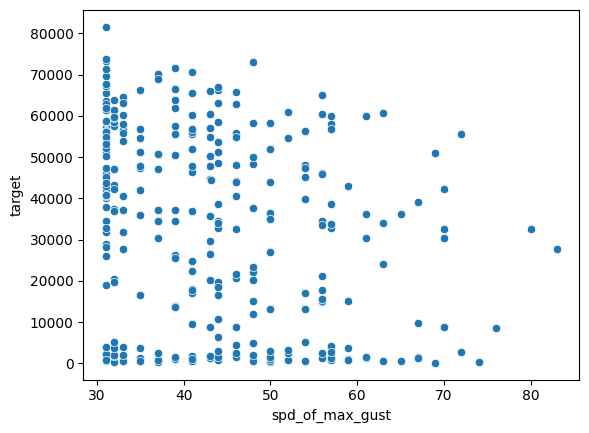

In [175]:
sns.scatterplot(x='spd_of_max_gust',y='target' ,data=merged_data)
plt.show()

In [176]:
merged_data.replace('<31', int(31), inplace=True)

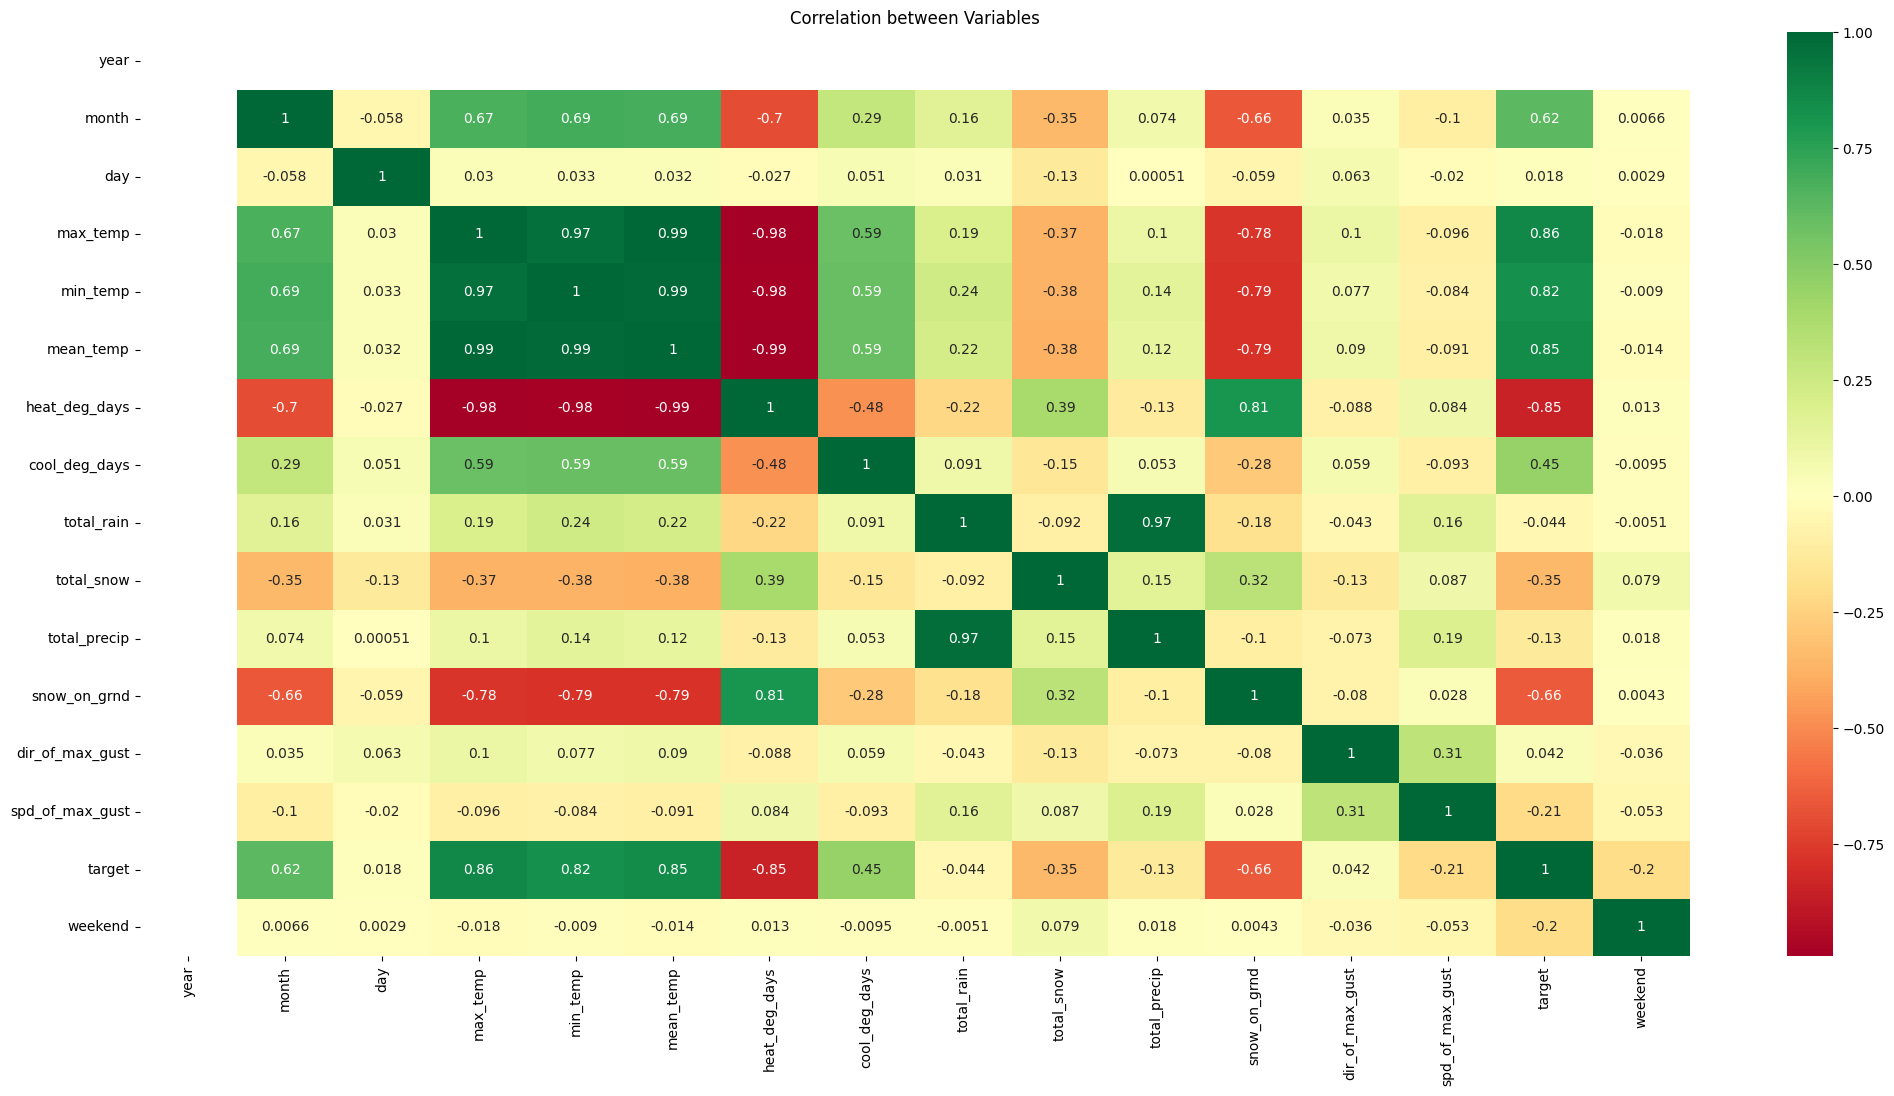

In [177]:
# Import the NumPy library and alias it as 'np' for convenience.
import numpy as np

# Exclude the 'date' column from the DataFrame.
merged_data_no_date = merged_data.drop('date', axis=1)

# Set the figure size to 25x12 inches.
plt.figure(figsize=(25, 12))

# Generate a heatmap to visualize the correlation matrix of the DataFrame.
# 'cmap' sets the color map, and 'annot=True' adds the correlation values to the cells.
sns.heatmap(merged_data_no_date.corr(), cmap='RdYlGn', annot=True)

# Set the title of the plot.
plt.title("Correlation between Variables")

# Show the plot.
plt.show()


In [178]:
merged_data = merged_data.drop(['day', 'spd_of_max_gust',"max_temp",'min_temp',"weekend"], axis=1)

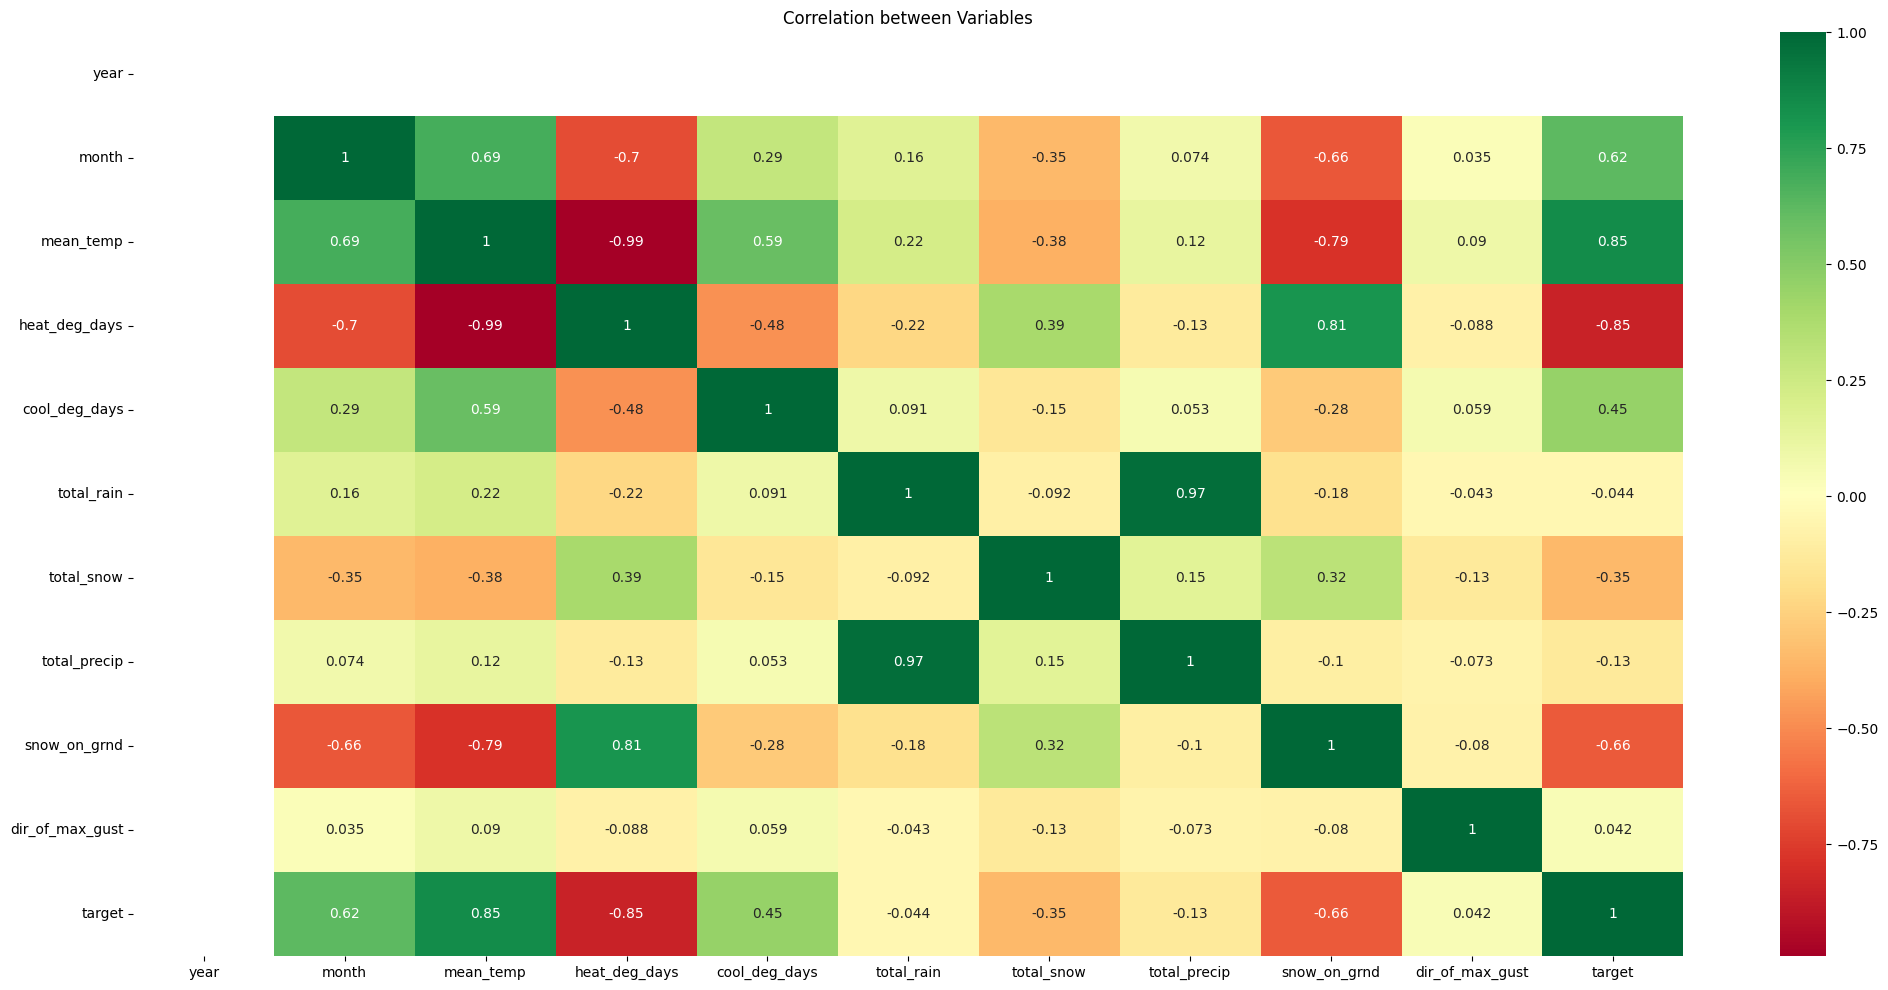

In [179]:
# Import necessary libraries and prepare the data
import numpy as np
merged_data_no_date = merged_data.drop('date', axis=1)  # Exclude 'Date' column

# Set up the figure for the heatmap
plt.figure(figsize=(25, 12))

# Generate a heatmap to visualize the correlation matrix of the DataFrame
# 'cmap' sets the color map, and 'annot=True' adds the correlation values to the cells
sns.heatmap(merged_data_no_date.corr(), cmap='RdYlGn', annot=True)

# Set the title of the plot
plt.title("Correlation between Variables")

# Display the plot
plt.show()

In [180]:
# Dictionary mapping numerical month values to their three-letter abbreviations.
month_dict = {
    1: 'jan',
    2: 'feb',
    3: 'mar',
    4: 'apr',
    5: 'may',
    6: 'jun',
    7: 'jul',
    8: 'aug',
    9: 'sep',
    10: 'oct',
    11: 'nov',
    12: 'dec'
}

# Apply a lambda function to map numerical months to their abbreviations in the 'month' column of 'merged_data'.
merged_data['month'] = merged_data['month'].apply(lambda x: month_dict[x])


In [181]:
merged_data

,date,year,month,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_precip,snow_on_grnd,dir_of_max_gust,target
0,2015-01-01,2015,jan,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,531.0
1,2015-01-02,2015,jan,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,804.0
2,2015-01-03,2015,jan,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,774.0
3,2015-01-04,2015,jan,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,158.0
4,2015-01-05,2015,jan,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,371.0
...,...,...,...,...,...,...,...,...,...,...,...,...
314,2015-11-11,2015,nov,7.4,10.6,0.0,0.2,0.0,0.2,0.0,14.8,40940.0
315,2015-11-12,2015,nov,9.1,8.9,0.0,15.6,0.0,15.6,0.0,23.0,24175.0
316,2015-11-13,2015,nov,5.2,12.8,0.0,0.0,0.0,0.0,0.0,24.0,23331.0
317,2015-11-14,2015,nov,2.0,16.0,0.0,0.0,0.0,0.0,0.0,26.0,13298.0


In [182]:
# One-hot encode the 'month' column and store the result in the 'months' DataFrame.
months = pd.get_dummies(merged_data.month)

# Concatenate the 'months' DataFrame with the original 'merged_data' along the columns (axis=1).
merged_data = pd.concat([months, merged_data], axis=1)

# Display the first 20 rows of the modified DataFrame.
merged_data.head(20)


,apr,aug,feb,jan,jul,jun,mar,may,nov,oct,...,month,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_precip,snow_on_grnd,dir_of_max_gust,target
0,False,False,False,True,False,False,False,False,False,False,...,jan,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,531.0
1,False,False,False,True,False,False,False,False,False,False,...,jan,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,804.0
2,False,False,False,True,False,False,False,False,False,False,...,jan,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,774.0
3,False,False,False,True,False,False,False,False,False,False,...,jan,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,158.0
4,False,False,False,True,False,False,False,False,False,False,...,jan,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,371.0
5,False,False,False,True,False,False,False,False,False,False,...,jan,-13.9,31.9,0.0,0.0,2.2,2.2,6.0,22.0,728.0
6,False,False,False,True,False,False,False,False,False,False,...,jan,-17.7,35.7,0.0,0.0,3.8,3.8,8.0,29.0,675.0
7,False,False,False,True,False,False,False,False,False,False,...,jan,-17.5,35.5,0.0,0.0,2.2,2.2,10.0,18.0,676.0
8,False,False,False,True,False,False,False,False,False,False,...,jan,-10.4,28.4,0.0,0.0,2.6,2.6,12.0,22.0,731.0
9,False,False,False,True,False,False,False,False,False,False,...,jan,-11.2,29.2,0.0,0.0,0.4,0.4,7.0,22.0,301.0


In [183]:
merged_data.dtypes

apr                          bool
aug                          bool
feb                          bool
jan                          bool
jul                          bool
jun                          bool
mar                          bool
may                          bool
nov                          bool
oct                          bool
sep                          bool
date               datetime64[ns]
year                        int64
month                      object
mean_temp                 float64
heat_deg_days             float64
cool_deg_days             float64
total_rain                float64
total_snow                float64
total_precip              float64
snow_on_grnd              float64
dir_of_max_gust           float64
target                    float64
dtype: object

In [184]:
# Drop the 'month', 'date', and 'year' columns from the 'merged_data' DataFrame.
merged_data.drop(['month', 'date','year'], axis = 1, inplace = True)


In [185]:
merged_data

,apr,aug,feb,jan,jul,jun,mar,may,nov,oct,sep,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_precip,snow_on_grnd,dir_of_max_gust,target
0,False,False,False,True,False,False,False,False,False,False,False,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,531.0
1,False,False,False,True,False,False,False,False,False,False,False,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,804.0
2,False,False,False,True,False,False,False,False,False,False,False,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,774.0
3,False,False,False,True,False,False,False,False,False,False,False,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,158.0
4,False,False,False,True,False,False,False,False,False,False,False,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,371.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,False,False,False,False,False,False,False,False,True,False,False,7.4,10.6,0.0,0.2,0.0,0.2,0.0,14.8,40940.0
315,False,False,False,False,False,False,False,False,True,False,False,9.1,8.9,0.0,15.6,0.0,15.6,0.0,23.0,24175.0
316,False,False,False,False,False,False,False,False,True,False,False,5.2,12.8,0.0,0.0,0.0,0.0,0.0,24.0,23331.0
317,False,False,False,False,False,False,False,False,True,False,False,2.0,16.0,0.0,0.0,0.0,0.0,0.0,26.0,13298.0


In [186]:
#Number of rows and columns
merged_data.shape

(319, 20)

In [187]:
merged_data.isnull().sum()

apr                0
aug                0
feb                0
jan                0
jul                0
jun                0
mar                0
may                0
nov                0
oct                0
sep                0
mean_temp          0
heat_deg_days      0
cool_deg_days      0
total_rain         0
total_snow         0
total_precip       0
snow_on_grnd       0
dir_of_max_gust    0
target             0
dtype: int64

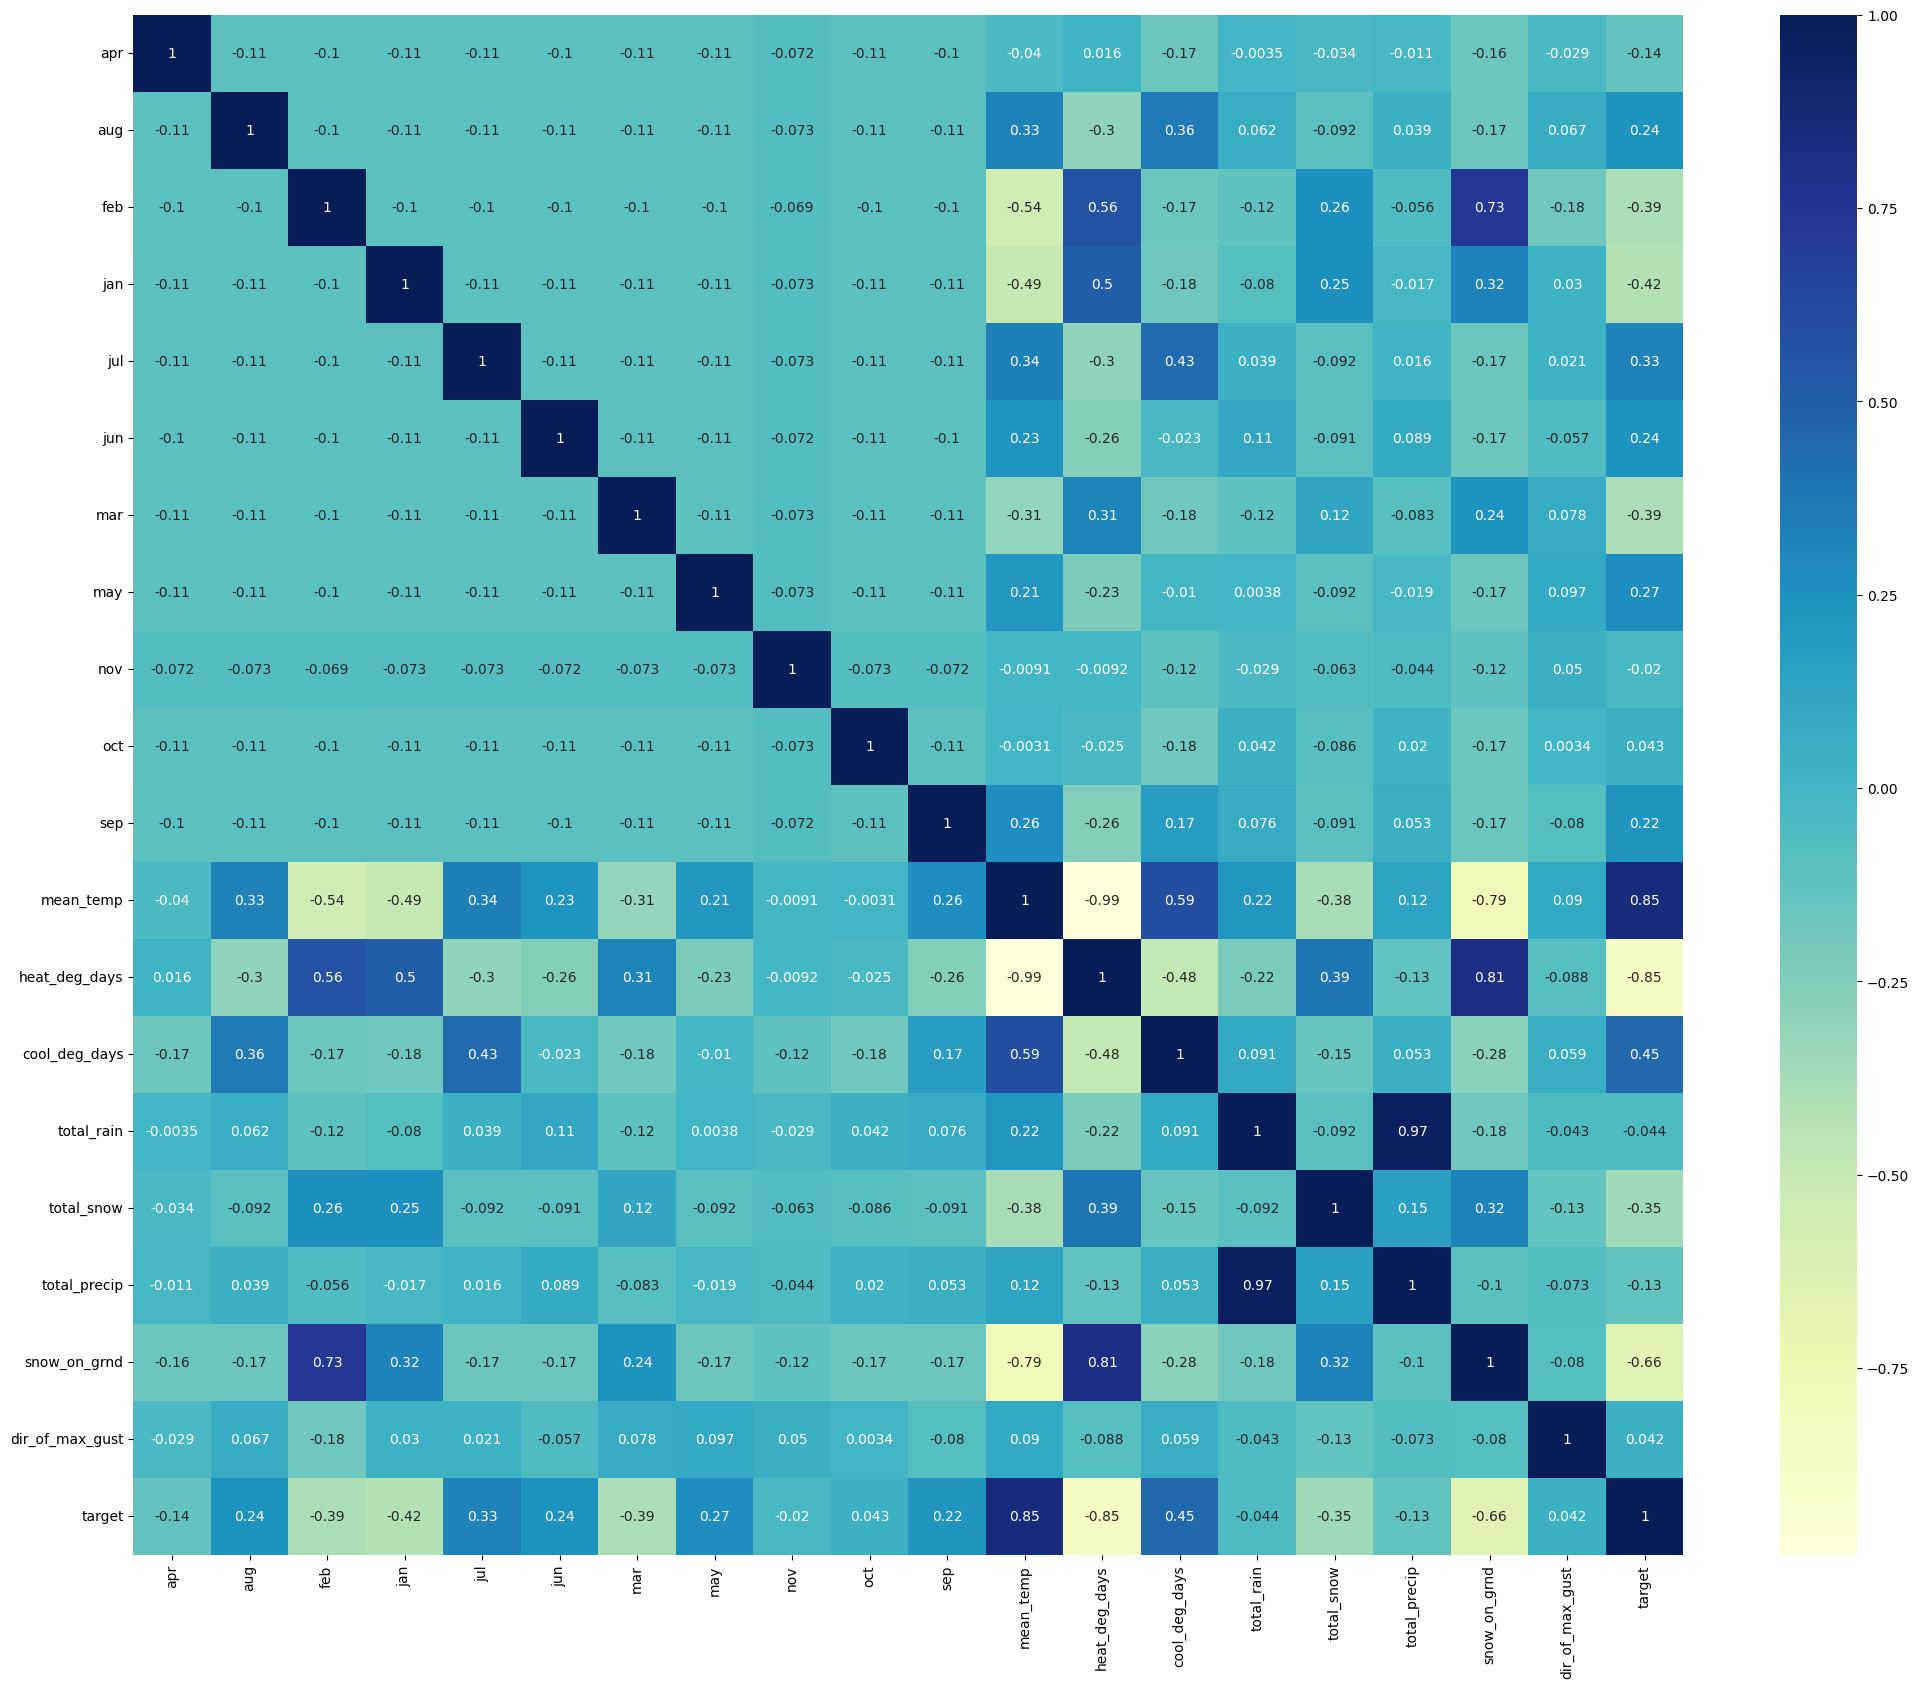

In [188]:
# Set the figure size to 25x20 inches.
plt.figure(figsize=(25, 20))

# Generate a heatmap to visualize the correlation matrix of the DataFrame.
# 'cmap' sets the color map, and 'annot=True' adds the correlation values to the cells.
sns.heatmap(merged_data.corr(), cmap='YlGnBu', annot=True)

# Show the plot.
plt.show()


In [189]:

#checkpoint_data.drop(columns=['Time', 'target', 'Date'], inplace=True)
# Append 'checkpoint_data' to 'merged_data'
#merged_data = pd.concat([merged_data, checkpoint_data], axis=1)


In [190]:
merged_data.head()

,apr,aug,feb,jan,jul,jun,mar,may,nov,oct,sep,mean_temp,heat_deg_days,cool_deg_days,total_rain,total_snow,total_precip,snow_on_grnd,dir_of_max_gust,target
0,False,False,False,True,False,False,False,False,False,False,False,-5.3,23.3,0.0,0.0,1.8,1.8,0.0,22.0,531.0
1,False,False,False,True,False,False,False,False,False,False,False,-8.8,26.8,0.0,0.0,0.0,0.0,1.0,27.0,804.0
2,False,False,False,True,False,False,False,False,False,False,False,-13.1,31.1,0.0,0.0,17.0,17.0,1.0,3.0,774.0
3,False,False,False,True,False,False,False,False,False,False,False,-2.8,20.8,0.0,26.8,0.4,27.2,8.0,26.0,158.0
4,False,False,False,True,False,False,False,False,False,False,False,-11.6,29.6,0.0,0.0,0.0,0.0,6.0,27.0,371.0


### =============================================================================
# Section 4: Model Building and Evaluation
### =============================================================================
### In this section, we build and evaluate machine learning models to predict the target variable based on the input features.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

# Assuming 'data' is your DataFrame
# Separate features (X) and target variable (y)
X = merged_data.drop(columns=['target'])
y = merged_data['target']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple feedforward neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Assuming this is a regression problem with a single output
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1700, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')


Epoch 1/1700
8/8 [==============================] - 0s 16ms/step - loss: 1452599680.0000 - val_loss: 1914760704.0000
Epoch 2/1700
8/8 [==============================] - 0s 3ms/step - loss: 1452557696.0000 - val_loss: 1914715904.0000
Epoch 3/1700
8/8 [==============================] - 0s 5ms/step - loss: 1452513408.0000 - val_loss: 1914668800.0000
Epoch 4/1700
8/8 [==============================] - 0s 4ms/step - loss: 1452462592.0000 - val_loss: 1914610432.0000
Epoch 5/1700
8/8 [==============================] - 0s 6ms/step - loss: 1452398976.0000 - val_loss: 1914532352.0000
Epoch 6/1700
8/8 [==============================] - 0s 4ms/step - loss: 1452316544.0000 - val_loss: 1914430208.0000
Epoch 7/1700
8/8 [==============================] - 0s 4ms/step - loss: 1452212096.0000 - val_loss: 1914297856.0000
Epoch 8/1700
8/8 [==============================] - 0s 5ms/step - loss: 1452073600.0000 - val_loss: 1914130944.0000
Epoch 9/1700
8/8 [==============================] - 0s 3ms/step - loss:

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

# Separate features (X) and target variable (y)
X = merged_data.drop(columns=['target'])
y = merged_data['target']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build an LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(1)  # Assuming this is a regression problem with a single output
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1500, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')


Epoch 1/1500
8/8 [==============================] - 1s 25ms/step - loss: 1452614912.0000 - val_loss: 1914799104.0000
Epoch 2/1500
8/8 [==============================] - 0s 5ms/step - loss: 1452612608.0000 - val_loss: 1914796032.0000
Epoch 3/1500
8/8 [==============================] - 0s 5ms/step - loss: 1452609408.0000 - val_loss: 1914791808.0000
Epoch 4/1500
8/8 [==============================] - 0s 5ms/step - loss: 1452604800.0000 - val_loss: 1914785408.0000
Epoch 5/1500
8/8 [==============================] - 0s 5ms/step - loss: 1452597376.0000 - val_loss: 1914774912.0000
Epoch 6/1500
8/8 [==============================] - 0s 6ms/step - loss: 1452584576.0000 - val_loss: 1914757120.0000
Epoch 7/1500
8/8 [==============================] - 0s 5ms/step - loss: 1452562688.0000 - val_loss: 1914724864.0000
Epoch 8/1500
8/8 [==============================] - 0s 5ms/step - loss: 1452523264.0000 - val_loss: 1914665600.0000
Epoch 9/1500
8/8 [==============================] - 0s 5ms/step - loss:

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch

# Separate features (X) and target variable (y)
X = merged_data.drop(columns=['target'])
y = merged_data['target']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the Hyperparameter Search Space
def build_model(hp):
    units = hp.Int('units', min_value=32, max_value=512, step=32)
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Run the Hyperparameter Search
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Number of different combinations to try
    executions_per_trial=1,  # Number of models to build and train per trial
    directory='auto_hyper_parameter_tuning_result',  # Directory to save results
    project_name='Data Poem Assignment 1800'  # Name of the project
)

tuner.search(X_train, y_train, epochs=1800, validation_data=(X_test, y_test))

# Get the Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Rebuild the Model with Best Hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train and Evaluate the Model
model.fit(X_train, y_train, epochs=1800, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')


Trial 5 Complete [00h 03m 16s]
val_loss: 86566240.0

Best val_loss So Far: 70026800.0
Total elapsed time: 00h 19m 50s
INFO:tensorflow:Oracle triggered exit


Epoch 1/1800
8/8 [==============================] - 1s 45ms/step - loss: 1452611456.0000 - val_loss: 1914785152.0000
Epoch 2/1800
8/8 [==============================] - 0s 16ms/step - loss: 1452595712.0000 - val_loss: 1914766848.0000
Epoch 3/1800
8/8 [==============================] - 0s 17ms/step - loss: 1452577792.0000 - val_loss: 1914743808.0000
Epoch 4/1800
8/8 [==============================] - 0s 17ms/step - loss: 1452555648.0000 - val_loss: 1914712960.0000
Epoch 5/1800
8/8 [==============================] - 0s 16ms/step - loss: 1452524928.0000 - val_loss: 1914670336.0000
Epoch 6/1800
8/8 [==============================] - 0s 16ms/step - loss: 1452482048.0000 - val_loss: 1914612864.0000
Epoch 7/1800
8/8 [==============================] - 0s 17ms/step - loss: 1452422784.0000 - val_loss: 1914535936.0000
Epoch 8/1800
8/8 [==============================] - 0s 17ms/step - loss: 1452347520.0000 - val_loss: 1914433792.0000
Epoch 9/1800
8/8 [==============================] - 0s 17ms/step

### =============================================================================
# Section 5: Conclusion
### =============================================================================
## This section provides a summary of the analysis and discusses the results of the model.

## Evaluation of model performance 
### - Model 1 (LSTM): MAPE: 0.3733
### - Model 2 (Feedforward Neural Network): MAPE: 0.3765
### - Model 3 (Hyperparameter Tuned LSTM): MAPE: 0.4281